<a href="https://colab.research.google.com/github/Marieke-do/Final-assignment---CO2-emissions/blob/main/Final_assignment_CO2_emissions_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Final assignment - CO2 emissions - part 1**


---


**1. What is the biggest predictor of a large CO2 output per capita of a country?**
2. Which countries are making the biggest strides in decreasing CO2 output? (Notebook: Final assignment - CO2 emissions_part2)
3. Which non-fossil fuel energy technology will have the best price in the future? (Notebook: Final assignment - CO2 emissions_part3)





A selection of possible biggest CO2 predictors has been made:
1. GDP per capita
2. Fossil fuel consumption
3. Land use 
4. Cattle livestock count
5. Daily meat consumption
6. Motor vehicle ownership
7. CO2 emission by aviation per capita
8. CO2 emission by transport per capita (excl aviation and shipping)






In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [ ]:
df_co2 = pd.read_csv('https://raw.githubusercontent.com/Marieke-do/Final-assignment---CO2-emissions/main/co2-emissions-vs-gdp.csv')
df_co2

Entity  ... Continent
0           Abkhazia  ...      Asia
1        Afghanistan  ...       NaN
2        Afghanistan  ...       NaN
3        Afghanistan  ...       NaN
4        Afghanistan  ...       NaN
...              ...  ...       ...
61077       Zimbabwe  ...       NaN
61078       Zimbabwe  ...       NaN
61079       Zimbabwe  ...       NaN
61080       Zimbabwe  ...       NaN
61081  Åland Islands  ...    Europe

[61082 rows x 8 columns]

In [ ]:
df_co2.rename(columns = {'Annual CO2 emissions (per capita)': 'Annual CO2'}, inplace =True )

**1. Correlation between CO2 and GDP per capita**

In [ ]:
df_co2.columns
df_co2_gdp = df_co2.drop(columns = ['Code', '145446-annotations', 'Total population (Gapminder, HYDE & UN)', 'Continent'])
df_co2_gdp

Entity  Year  Annual CO2  GDP per capita
0           Abkhazia  2015         NaN             NaN
1        Afghanistan  1949      0.0019             NaN
2        Afghanistan  1950      0.0109          1156.0
3        Afghanistan  1951      0.0117          1170.0
4        Afghanistan  1952      0.0115          1189.0
...              ...   ...         ...             ...
61077       Zimbabwe  1901         NaN             NaN
61078       Zimbabwe  1902         NaN             NaN
61079       Zimbabwe  2020         NaN             NaN
61080       Zimbabwe  2021         NaN             NaN
61081  Åland Islands  2015         NaN             NaN

[61082 rows x 4 columns]

In [ ]:
# There are a lot of missing data. However, the Pandas method of calculate the Pearson correlation coefficient excludes NA/null values.
# Therefore calculations will be performed without deleting/imputating missing data.
# I don't know why this data is missing and how imputating the data will affect the analyses. 
# Since this is the main data I will work with, I choose to not imputate the data and keep/ignore the NA/null values. 


In [ ]:
# Pearson correlation coefficient 

pearson_co2_gdp = df_co2.corr(method='pearson')
pearson_co2_gdp

Year  ...  Total population (Gapminder, HYDE & UN)
Year                                     1.000000  ...                                 0.030454
Annual CO2                               0.112255  ...                                -0.013483
GDP per capita                           0.293547  ...                                 0.004419
Total population (Gapminder, HYDE & UN)  0.030454  ...                                 1.000000

[4 rows x 4 columns]

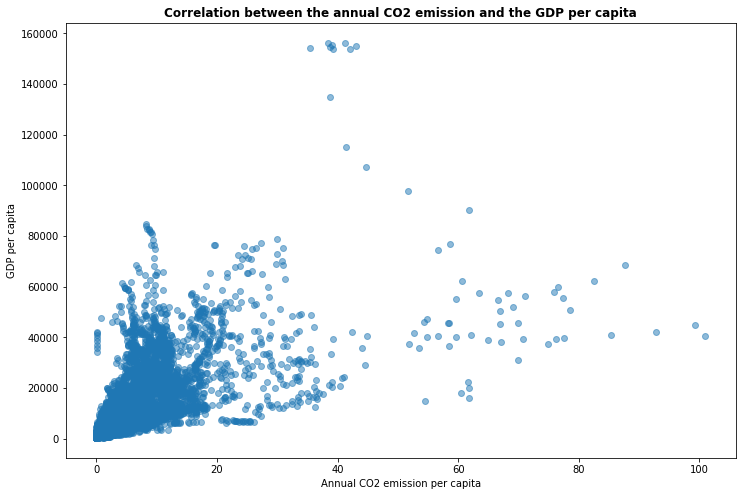

In [ ]:
# Make scatterplot
from numpy.polynomial.polynomial import polyfit

%matplotlib inline

fig, ax = plt.subplots()

ax.scatter(df_co2_gdp['Annual CO2'], df_co2_gdp['GDP per capita'], alpha = 0.5)
plt.xlabel('Annual CO2 emission per capita')
plt.ylabel('GDP per capita')
plt.title('Correlation between the annual CO2 emission and the GDP per capita', fontweight = 'bold')

fig.set_size_inches(12,8)
plt.show()

The Pearson correlation coefficient between the annual CO2 per capita and GDP per capita is 0.67. This indicates there is a moderate to high positive correlation between the two.

In [ ]:
# Let's remove GDP per capita from df_co2 for Pearson correlation with other factors

df_co2.drop(columns = ['Code', 'GDP per capita', '145446-annotations', 'Total population (Gapminder, HYDE & UN)', 'Continent'], inplace=True)
df_co2

Entity  Year  Annual CO2
0           Abkhazia  2015         NaN
1        Afghanistan  1949      0.0019
2        Afghanistan  1950      0.0109
3        Afghanistan  1951      0.0117
4        Afghanistan  1952      0.0115
...              ...   ...         ...
61077       Zimbabwe  1901         NaN
61078       Zimbabwe  1902         NaN
61079       Zimbabwe  2020         NaN
61080       Zimbabwe  2021         NaN
61081  Åland Islands  2015         NaN

[61082 rows x 3 columns]

In [ ]:
df_fossil = pd.read_csv('https://raw.githubusercontent.com/Marieke-do/Final-assignment---CO2-emissions/main/fossil-fuel-cons-per-capita.csv')
df_cattle = pd.read_csv('https://raw.githubusercontent.com/Marieke-do/Final-assignment---CO2-emissions/main/cattle-livestock-count-heads.csv')
df_meat = pd.read_csv('https://raw.githubusercontent.com/Marieke-do/Final-assignment---CO2-emissions/main/daily-meat-consumption-per-person.csv')
df_motor = pd.read_csv('https://raw.githubusercontent.com/Marieke-do/Final-assignment---CO2-emissions/main/motor-vehicle-ownership-per-1000-inhabitants.csv')
df_aviation = pd.read_csv('https://raw.githubusercontent.com/Marieke-do/Final-assignment---CO2-emissions/main/per-capita-co2-aviation.csv')
df_transport = pd.read_csv('https://raw.githubusercontent.com/Marieke-do/Final-assignment---CO2-emissions/main/per-capita-co2-transport.csv')
df_land_use = pd.read_csv('https://raw.githubusercontent.com/Marieke-do/Final-assignment---CO2-emissions/main/global-co2-emissions-fossil-land.csv')
df_agriculture = pd.read_csv('https://raw.githubusercontent.com/Marieke-do/Final-assignment---CO2-emissions/main/agricultural-land.csv')

**2. Correlation between CO2 and fossil energy use**

In [ ]:
df_fossil.columns
# df_fossil.drop(columns = 'Code', inplace = True)

# Add a column with total fossil energy use per capita
df_fossil['Total fossil'] = df_fossil['Coal per capita (kWh)'] + df_fossil['Gas per capita (kWh)'] + df_fossil['Oil per capita (kWh)']
df_fossil

Entity      Code  ...  Gas per capita (kWh)  Total fossil
0     Africa       NaN  ...                29.811      2058.245
1     Africa       NaN  ...                32.505      2103.541
2     Africa       NaN  ...                31.327      2063.597
3     Africa       NaN  ...                30.957      2107.265
4     Africa       NaN  ...                35.267      2082.553
...      ...       ...  ...                   ...           ...
4285   World  OWID_WRL  ...              4712.883     17550.112
4286   World  OWID_WRL  ...              4768.212     17511.448
4287   World  OWID_WRL  ...              4847.155     17556.325
4288   World  OWID_WRL  ...              5047.332     17796.569
4289   World  OWID_WRL  ...              5094.008     17730.236

[4290 rows x 7 columns]

In [ ]:
# Merge CO2 dataframe and Fossil energy dataframe on 'Entity' and 'Year' columns

df_co2_fossil = pd.merge(df_co2, df_fossil, on=['Entity', 'Year'])
df_co2_fossil

In [ ]:
# Calculate Pearson correlation 

pearson_co2_fossil = df_co2_fossil.corr(method='pearson')
pearson_co2_fossil

Year  Annual CO2  ...  Gas per capita (kWh)  Total fossil
Year                   1.000000    0.016164  ...              0.152866      0.118400
Annual CO2             0.016164    1.000000  ...              0.713403      0.820904
Coal per capita (kWh) -0.033151    0.313614  ...             -0.071982      0.261333
Oil per capita (kWh)   0.056368    0.555464  ...              0.402203      0.785102
Gas per capita (kWh)   0.152866    0.713403  ...              1.000000      0.833745
Total fossil           0.118400    0.820904  ...              0.833745      1.000000

[6 rows x 6 columns]

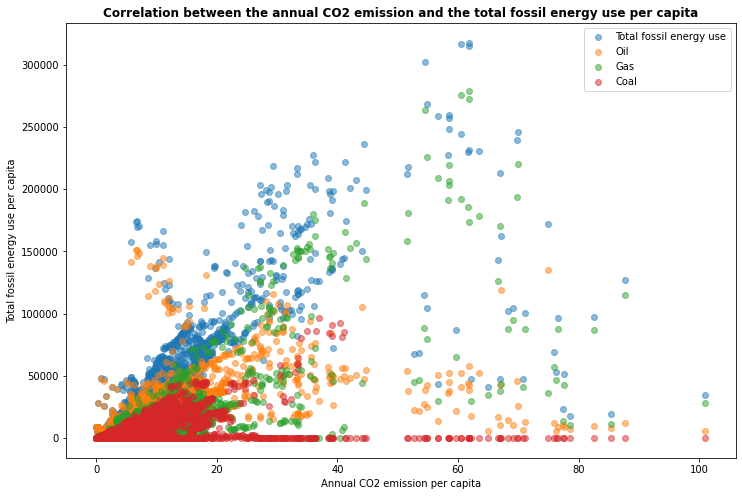

In [ ]:
# Scatterplot CO2 and Fossil energy use

from numpy.polynomial.polynomial import polyfit

%matplotlib inline

fig, ax = plt.subplots()

ax.scatter(df_co2_fossil['Annual CO2'], df_co2_fossil['Total fossil'], alpha = 0.5, label = 'Total fossil energy use')
ax.scatter(df_co2_fossil['Annual CO2'], df_co2_fossil['Oil per capita (kWh)'], alpha = 0.5, label = 'Oil')
ax.scatter(df_co2_fossil['Annual CO2'], df_co2_fossil['Gas per capita (kWh)'], alpha = 0.5, label = 'Gas')
ax.scatter(df_co2_fossil['Annual CO2'], df_co2_fossil['Coal per capita (kWh)'], alpha = 0.5, label = 'Coal')
plt.xlabel('Annual CO2 emission per capita')
plt.ylabel('Total fossil energy use per capita')
plt.title('Correlation between the annual CO2 emission and the total fossil energy use per capita', fontweight = 'bold')
plt.legend()

fig.set_size_inches(12,8)
plt.show()

The Pearson correlation coefficient between the annual CO2 per capita and the total fossil energy use per capita is 0.82. This indicates there is a high positive correlation between the two. 
When looking at the different sources for fossil energy, you can see that the use of gas and CO2 have the highest correlation coefficient (0.71 vs coal: 0.31 and oil: 0.56).

In [ ]:
# Write function to calculate Pearson correlation and show scatter plot

def merge_and_cor(df, col):
  df_merge = pd.merge(df_co2, df, on = ['Entity', 'Year'])
  pearson_cor = df_merge.corr(method = 'pearson')

  fig, ax = plt.subplots()
  ax.scatter(df_merge['Annual CO2'], df_merge[col], alpha = 0.5)
  plt.xlabel('Annual CO2 emission per capita')
  plt.ylabel(col)
  plt.title(f'Correlation between the annual CO2 emission per capita and {col}', fontweight = 'bold')

  fig.set_size_inches(12,8)
  plt.show()
  return(pearson_cor)

**3. Correlation between CO2 and land use change**

In [ ]:
# prepare df_land_use for analysis
df_land_use.columns
df_land_use.drop(columns=['Code', 'Fossil fuel and industry emissions (GtCO2)' ], inplace = True)
df_land_use.rename(columns={'Land use emissions (GtCO2)': 'Land use'}, inplace=True)
# df_land_use.isnull().sum()
df_land_use

Entity  Year      Land use
0    World  1850  2.520145e+09
1    World  1851  2.534693e+09
2    World  1852  2.552749e+09
3    World  1853  2.571777e+09
4    World  1854  2.581867e+09
..     ...   ...           ...
264  World  1845           NaN
265  World  1846           NaN
266  World  1847           NaN
267  World  1848           NaN
268  World  1849           NaN

[269 rows x 3 columns]

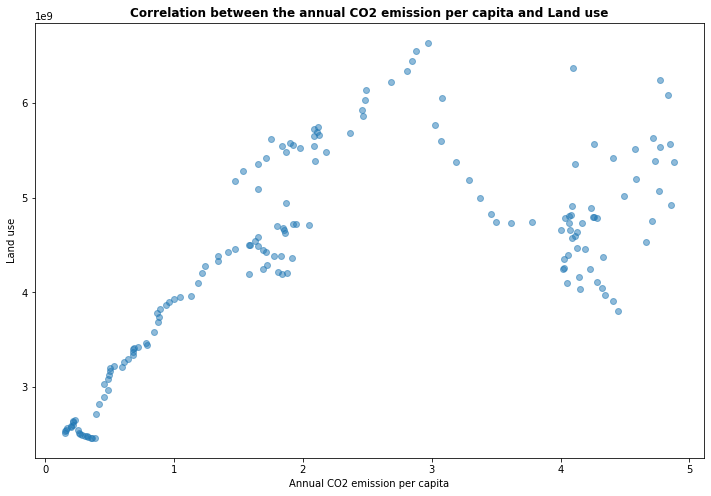

Year  Annual CO2  Land use
Year        1.000000    0.955877  0.746560
Annual CO2  0.955877    1.000000  0.635046
Land use    0.746560    0.635046  1.000000

In [ ]:
# Merge CO2 and land use DataFrames on year and entity and calculate Pearson corr coef

merge_and_cor(df_land_use, 'Land use')


There is correlation between change in land use and CO2 emission of 0.64. This is only based on 'world' data and not per country. However, this indicates there is a moderate positive correlation between the two.   

---

Let's also look at agricultural land use per country

**3a. Correlation between CO2 and agricultural land use**

In [ ]:
# prepare df_agriculture for analysis
df_agriculture.columns
# df_agriculture.drop(columns=['Code'], inplace = True)
df_agriculture.rename(columns = {'agricultural_land': 'agricultural land'}, inplace = True)
# df_cattle.isnull().sum()
df_agriculture

Entity  Year  agricultural land
0      Afghanistan  1961         37700000.0
1      Afghanistan  1962         37760000.0
2      Afghanistan  1963         37810000.0
3      Afghanistan  1964         37873000.0
4      Afghanistan  1965         37875000.0
...            ...   ...                ...
13362     Zimbabwe  2014         16200000.0
13363     Zimbabwe  2015         16200000.0
13364     Zimbabwe  2016         16200000.0
13365     Zimbabwe  2017         16200000.0
13366     Zimbabwe  2018         16200000.0

[13367 rows x 3 columns]

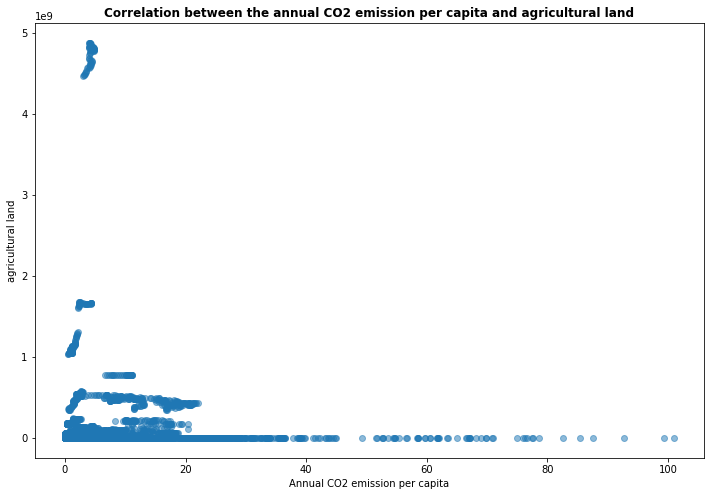

Year  Annual CO2  agricultural land
Year               1.000000    0.069366          -0.002492
Annual CO2         0.069366    1.000000           0.012890
agricultural land -0.002492    0.012890           1.000000

In [ ]:
# Merge CO2 and agriculture DataFrames on year and entity and calculate Pearson corr coef

merge_and_cor(df_agriculture, 'agricultural land')

The Pearson correlation coefficient between annual CO2 emission and the area used for agricultural land use is 0.013. There is a very low positive to neglegible correlation between the two. 

**4. Correlation between CO2 and cattle livestock**

In [ ]:
# prepare df_cattle for analysis
df_cattle.columns
df_cattle.drop(columns=['Code'], inplace = True)
df_cattle.rename(columns={'Live Animals - Cattle - 866 - Stocks - 5111 - Head': 'Cattle'}, inplace=True)
# df_cattle.isnull().sum()
df_cattle


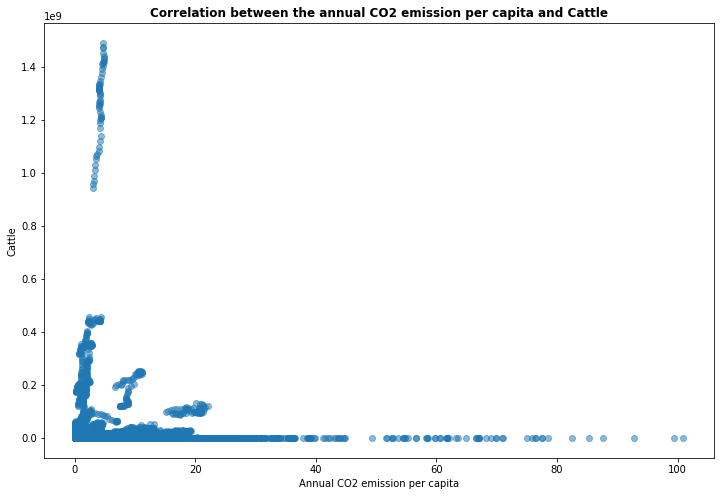

Year  Annual CO2    Cattle
Year        1.000000    0.074741  0.011737
Annual CO2  0.074741    1.000000 -0.005790
Cattle      0.011737   -0.005790  1.000000

In [ ]:
# Merge CO2 and cattle DataFrames on year and entity and calculate Pearson corr coef

merge_and_cor(df_cattle, 'Cattle')


The Pearson correlation coefficient between the annual CO2 per capita and the number of cattle in a country is -0.0058. This indicates there is a very weak negative to negligible correlation between the two. 

**5. Correlation between CO2 and daily meat consumption**

In [ ]:
# prepare df_meat for analysis

df_meat.columns
df_meat.drop(columns = 'Code', inplace=True)
df_meat.rename(columns = {'Food Balance Sheets: Meat - Food supply quantity (kg/capita/yr) (FAO (2017))': 'Meat supply'}, inplace=True)
df_meat

Entity  Year  Meat supply
0      Afghanistan  1961      39.5930
1      Afghanistan  1962      39.6204
2      Afghanistan  1963      40.7712
3      Afghanistan  1964      41.2918
4      Afghanistan  1965      42.1412
...            ...   ...          ...
10388     Zimbabwe  2009      56.3618
10389     Zimbabwe  2010      54.9644
10390     Zimbabwe  2011      56.8824
10391     Zimbabwe  2012      55.8960
10392     Zimbabwe  2013      49.9776

[10393 rows x 3 columns]

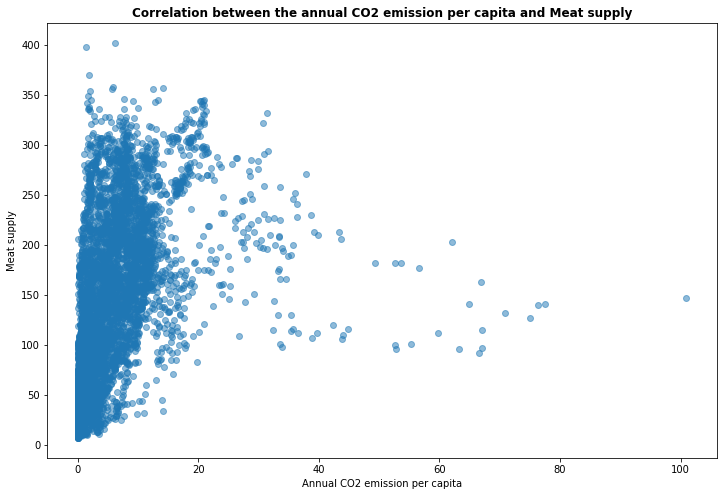

Year  Annual CO2  Meat supply
Year         1.000000    0.086621     0.213669
Annual CO2   0.086621    1.000000     0.552720
Meat supply  0.213669    0.552720     1.000000

In [ ]:
# Merge CO2 and meat DataFrames on year and entity and calculate Pearson corr coef
merge_and_cor(df_meat, 'Meat supply')

The Pearson correlation coefficient between the annual CO2 per capita and the meat consumption per person is 0.55. This indicates there is a moderate positive correlation between the two.

> Ingesprongen blok



**6. Correlation between CO2 and motor vehicle ownership**


In [ ]:
# prepare df_motor for analysis
df_motor.columns
df_motor.drop(columns = ['Code'], inplace=True)
df_motor.rename(columns={'Motor vehicles per 1000 people (NationMaster (2014))': 'Motor vehicles'}, inplace=True)
# print(df_motor.isnull().sum())
df_motor

Entity  Year  Motor vehicles
0            Afghanistan  2014              28
1                Albania  2014             124
2                Algeria  2014             114
3                 Angola  2014              38
4    Antigua and Barbuda  2014             230
..                   ...   ...             ...
185            Venezuela  2014             147
186              Vietnam  2014              23
187                Yemen  2014              35
188               Zambia  2014              21
189             Zimbabwe  2014             114

[190 rows x 3 columns]

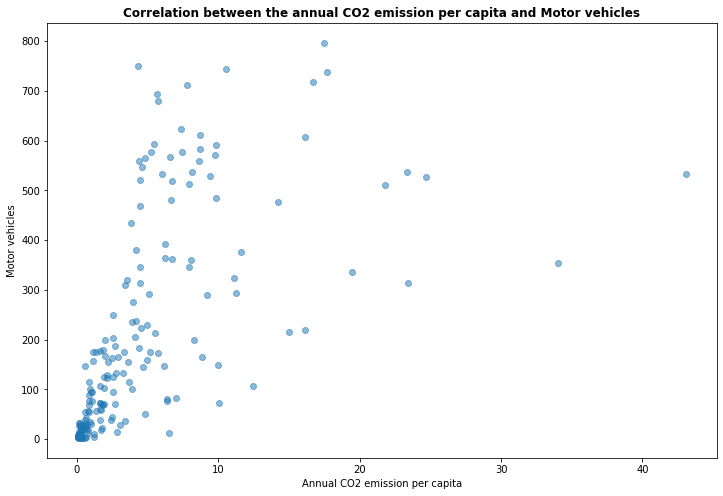

Year  Annual CO2  Motor vehicles
Year             NaN         NaN             NaN
Annual CO2       NaN    1.000000        0.608639
Motor vehicles   NaN    0.608639        1.000000

In [ ]:
# Merge DataFrames and calculate Pearson corr coef

merge_and_cor(df_motor, 'Motor vehicles')

The Pearson correlation coefficient between the annual CO2 per capita and number of vehicles per 1000 people in 2014 is 0.61. This indicates there is a moderate positive correlation between the two.

---


Note: number of vehicles is only known for the year 2014.

**7. Correlation between CO2 and CO2 emission by aviation per capita**

In [ ]:
# prepare df_aviation for analysis
df_aviation.columns
df_aviation.drop(columns = ['Code'], inplace=True)
df_aviation.rename(columns={'Per capita aviation CO2': 'Aviation'}, inplace=True)
# print(df_aviation.isnull().sum())
df_aviation


Entity  Year    Aviation
0      Afghanistan  2018    5.013335
1          Algeria  2018   23.854029
2           Angola  2018   15.064023
3        Argentina  2018   94.515412
4        Australia  2018  763.115248
..             ...   ...         ...
101  United States  2018  556.121401
102     Uzbekistan  2018   16.857487
103      Venezuela  2018   15.047483
104        Vietnam  2018   57.141214
105          World  2018   97.862610

[106 rows x 3 columns]

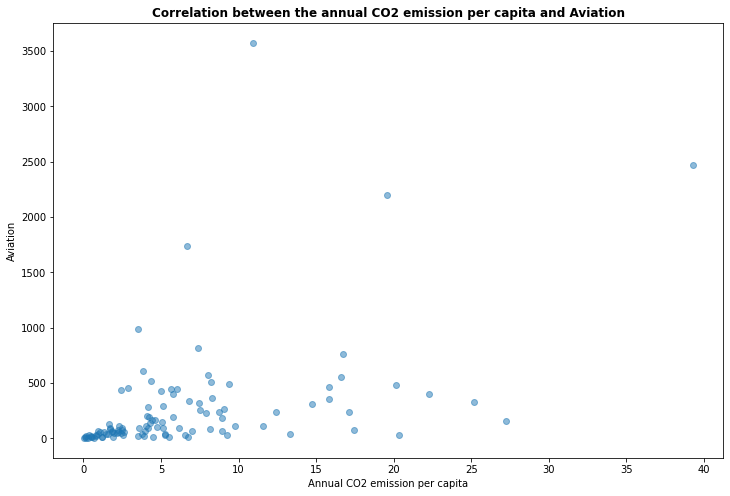

Year  Annual CO2  Aviation
Year         NaN         NaN       NaN
Annual CO2   NaN    1.000000  0.460567
Aviation     NaN    0.460567  1.000000

In [ ]:
# Merge DataFrames and calculate Pearson corr coef
merge_and_cor(df_aviation, 'Aviation')

The Pearson correlation coefficient between the annual CO2 per capita and the CO2 emission by aviation per capita in 2018 is 0.46. This indicates there is a low to moderate positive correlation between the two.

---


Note: The CO2 emission by aviation is only known for the year 2018.

**8. Correlation between CO2 and CO2 emission by transport per capita (excl aviation and shipping)**

In [ ]:
# Prepare df_transport for analysis

df_transport.columns
df_transport.drop(columns = ['Code'], inplace=True)
df_transport.rename(columns={'Transport (per capita) (CAIT, 2020)': 'Transport'}, inplace=True)
# print(df_aviation.isnull().sum())
df_transport

Entity  Year  Transport
0      Albania  1990   0.213025
1      Albania  1991   0.152439
2      Albania  1992   0.123229
3      Albania  1993   0.156495
4      Albania  1994   0.190658
...        ...   ...        ...
3683  Zimbabwe  2012   0.198246
3684  Zimbabwe  2013   0.217228
3685  Zimbabwe  2014   0.191359
3686  Zimbabwe  2015   0.180963
3687  Zimbabwe  2016   0.149679

[3688 rows x 3 columns]

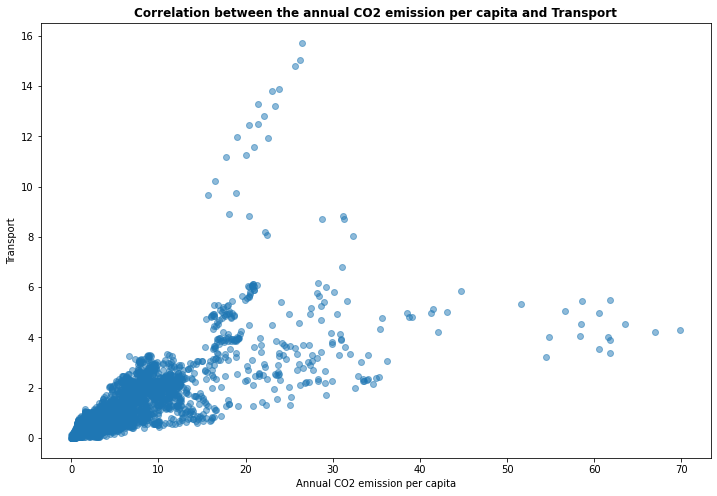

Year  Annual CO2  Transport
Year        1.000000   -0.006947   0.067544
Annual CO2 -0.006947    1.000000   0.729081
Transport   0.067544    0.729081   1.000000

In [ ]:
# Merge DataFrames and calculate Pearson corr coef
merge_and_cor(df_transport, 'Transport')

The Pearson correlation coefficient between the annual CO2 per capita and the CO2 emission by transport per capita in 2018 is 0.7346. This indicates there is a high positive correlation between the two.

**Conclusion**

The biggest predictor of a large CO2 output per capita of a country is the use of fossil energy (gas, oil, coal) per capita with a Pearson correlation coefficient of 0.82. The consumption of gas is the biggest contributor.
The amount of CO2 emitted by transport other than aviation is also contributing largely to the total CO2 emission of a country. The Pearson correlation coefficient between those two is 0.73.
 

---
There is also a high positive correlation between CO2 and GDP per capita. It is likely however, that countries with high GDP have a positive correlation with factors that cause CO2 emission (rich countries have more cars, people fly more, have more money to consume meat etc.). See correlations below:



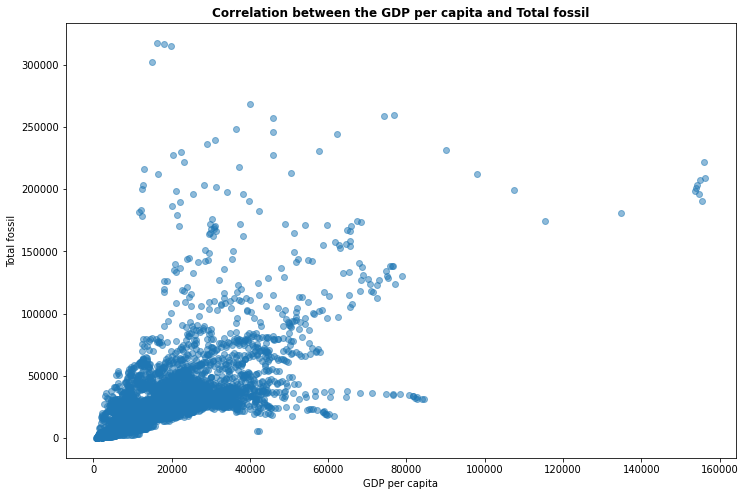

Year  ...  Total fossil
Year                   1.000000  ...      0.118400
GDP per capita         0.396796  ...      0.634811
Coal per capita (kWh) -0.033151  ...      0.261333
Oil per capita (kWh)   0.056368  ...      0.785102
Gas per capita (kWh)   0.152866  ...      0.833745
Total fossil           0.118400  ...      1.000000

[6 rows x 6 columns]

In [ ]:
df_gdp = df_co2_gdp.drop(columns = 'Annual CO2')
df_gdp

def merge_and_cor_gdp(df, col):
  df_merge = pd.merge(df_gdp, df, on = ['Entity', 'Year'])
  pearson_cor = df_merge.corr(method = 'pearson')

  fig, ax = plt.subplots()
  ax.scatter(df_merge['GDP per capita'], df_merge[col], alpha = 0.5)
  plt.xlabel('GDP per capita')
  plt.ylabel(col)
  plt.title(f'Correlation between the GDP per capita and {col}', fontweight = 'bold')

  fig.set_size_inches(12,8)
  plt.show()
  return(pearson_cor)

merge_and_cor_gdp(df_fossil, 'Total fossil')



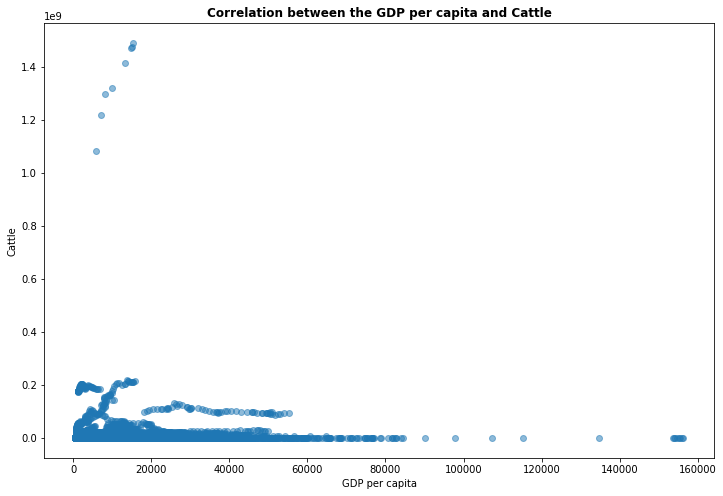

Year  GDP per capita    Cattle
Year            1.000000        0.307921  0.011737
GDP per capita  0.307921        1.000000  0.008287
Cattle          0.011737        0.008287  1.000000

In [ ]:
merge_and_cor_gdp(df_cattle, 'Cattle')

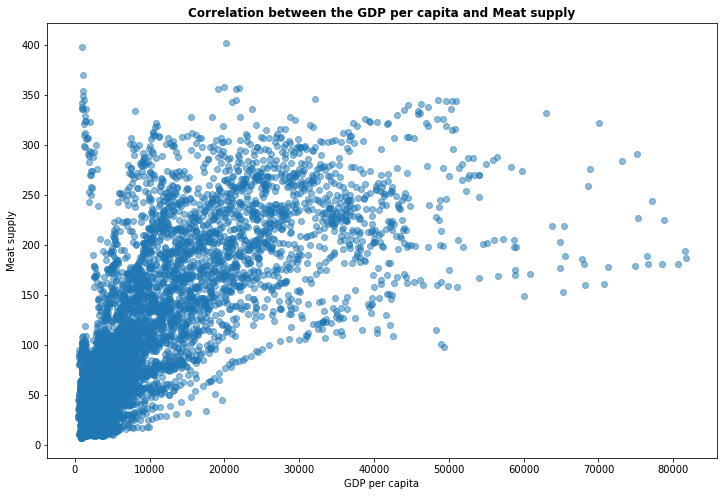

Year  GDP per capita  Meat supply
Year            1.000000        0.283059     0.213669
GDP per capita  0.283059        1.000000     0.720453
Meat supply     0.213669        0.720453     1.000000

In [ ]:
merge_and_cor_gdp(df_meat, 'Meat supply')


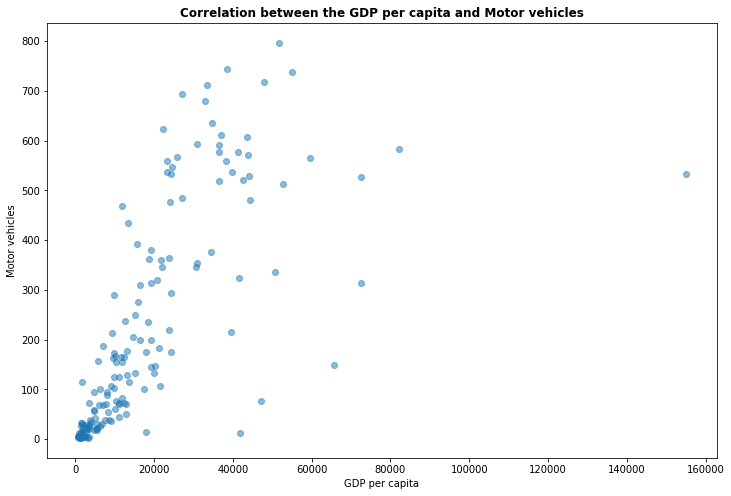

Year  GDP per capita  Motor vehicles
Year             NaN             NaN             NaN
GDP per capita   NaN        1.000000        0.698543
Motor vehicles   NaN        0.698543        1.000000

In [ ]:
merge_and_cor_gdp(df_motor, 'Motor vehicles')


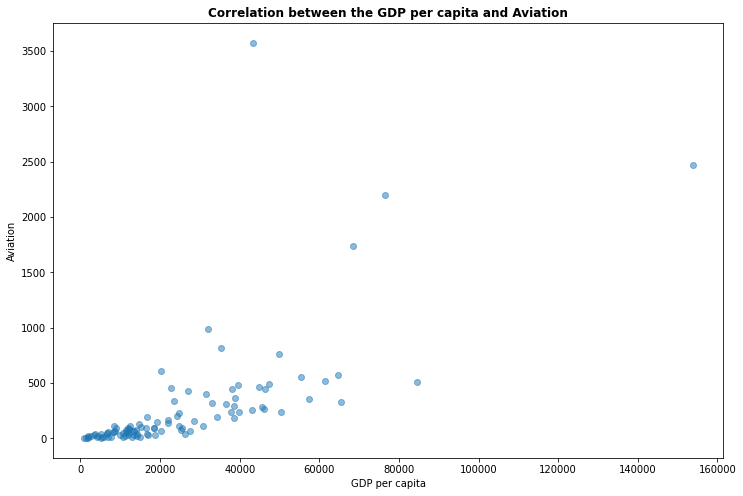

Year  GDP per capita  Aviation
Year             NaN             NaN       NaN
GDP per capita   NaN        1.000000  0.672617
Aviation         NaN        0.672617  1.000000

In [ ]:
merge_and_cor_gdp(df_aviation, 'Aviation')


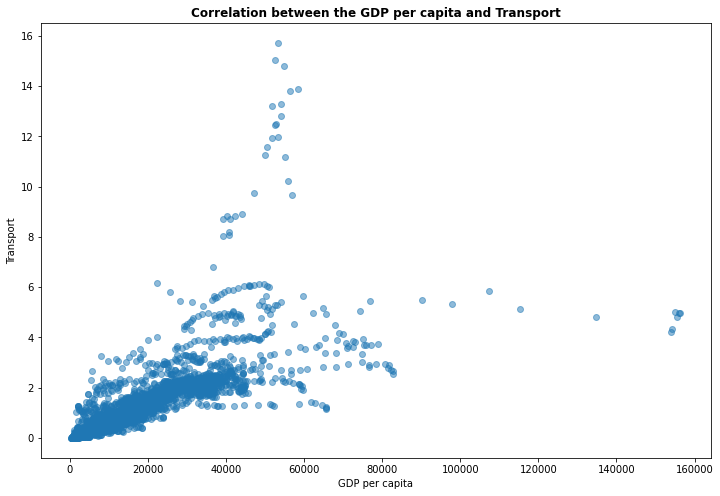

Year  GDP per capita  Transport
Year            1.000000        0.227167   0.067544
GDP per capita  0.227167        1.000000   0.747103
Transport       0.067544        0.747103   1.000000

In [ ]:
merge_and_cor_gdp(df_transport, 'Transport')